In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from statsmodels.tsa.stattools import acf
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('auto-mpg.csv')
df.columns = [col.replace(' ', '_') for col in df.columns]

In [5]:
df = df[df.horsepower.str.isnumeric()]
df.horsepower = pd.to_numeric(df.horsepower)

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
df.drop(columns=['car_name'], inplace=True)

In [8]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [11]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


<Axes: >

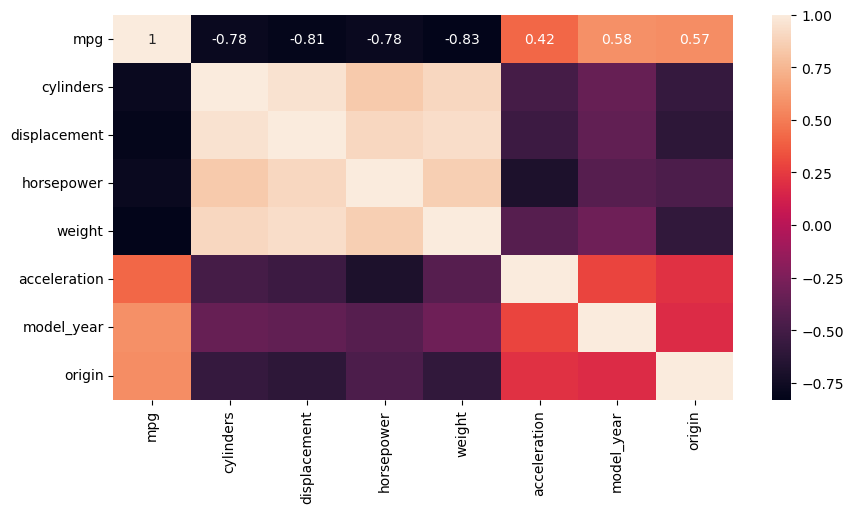

In [9]:
corr = df.corr().round(2)
plt.figure(figsize = (10,5))
sns.heatmap(corr, annot = True )

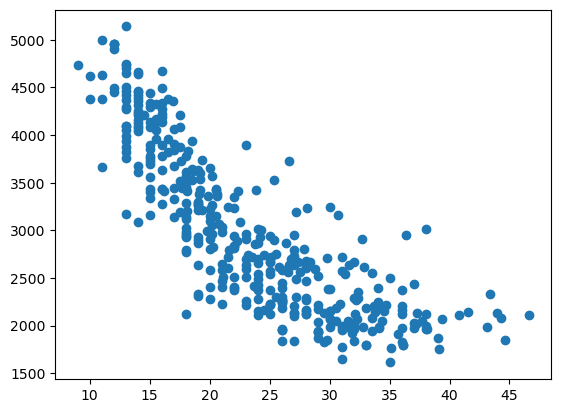

In [10]:
plt.scatter(df.mpg, df.weight)

In [11]:
from scipy.stats import pearsonr, spearmanr

In [12]:
pearsonr(df.mpg, df.weight)

PearsonRResult(statistic=-0.8322442148315756, pvalue=6.015296051434213e-102)

In [13]:
spearmanr(df.mpg, df.weight)

SignificanceResult(statistic=-0.8755851198739869, pvalue=2.662377938025222e-125)

## Simple linear regression 

In [14]:
lin_reg = LinearRegression(fit_intercept=True)

In [15]:
y = df.horsepower.to_numpy()
X = df.displacement.to_numpy()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [17]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [18]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [19]:
lin_reg.coef_

array([0.32619517])

In [20]:
lin_reg.intercept_

40.706098484308185

In [21]:
y_hat_train = lin_reg.predict(X_train)

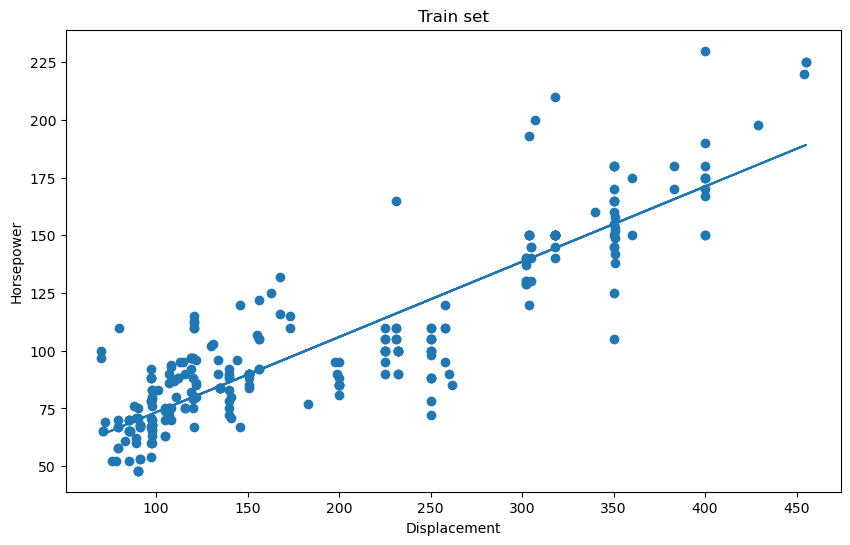

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train)
plt.xlabel('Displacement')
plt.ylabel('Horsepower')
plt.title('Train set')
plt.plot(X_train, y_hat_train)

In [23]:
y_hat_test = lin_reg.predict(X_test)

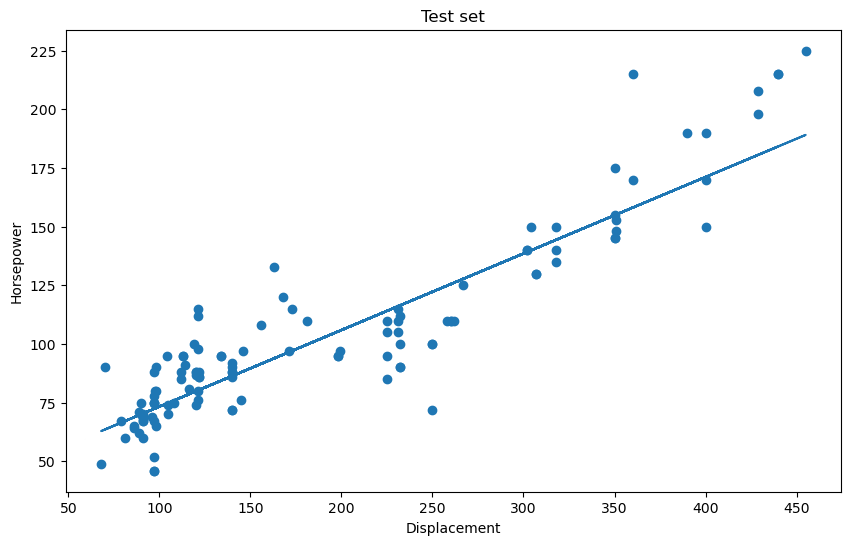

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test)
plt.xlabel('Displacement')
plt.ylabel('Horsepower')
plt.title('Test set')
plt.plot(X_test, y_hat_test)

## Основни метрики при регресия

### $R^{2}$ 

In [25]:
lin_reg.score(X_train, y_train)

0.7914033981612862

### MSE - средноквадратична грешка

In [26]:
mean_squared_error(y_hat_train, y_train)

302.24145008498533

In [27]:
mean_squared_error(y_hat_test, y_test)

256.0839343236302

### RMSE - корен квадратен от MSE

In [28]:
np.sqrt(mean_squared_error(y_hat_train, y_train))

17.385092754569513

### MAE - средна абсолютна грешка

In [32]:
mean_absolute_error(y_hat_train, y_train)

12.716437801495845

### MAPE - средна абсолютна процентна грешка

In [33]:
np.sum(np.abs((y_hat_train-y_train)/y_train))/274

0.12743959021687398

## Multiple regression

In [34]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

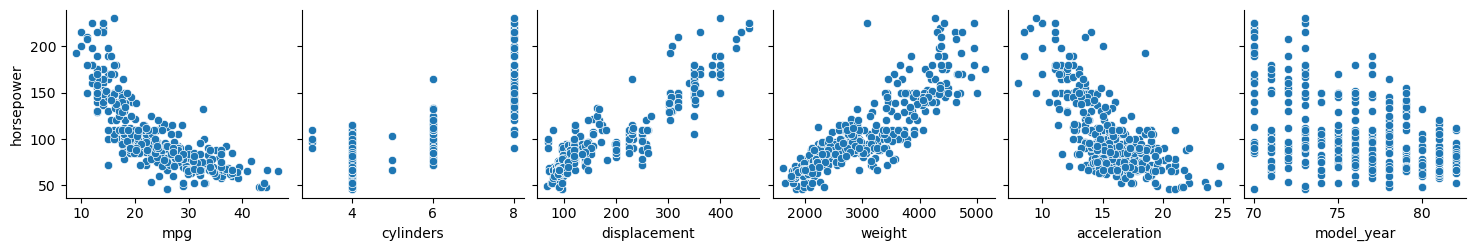

In [35]:
sns.pairplot(df, x_vars=['mpg', 'cylinders', 'displacement',  'weight',
       'acceleration', 'model_year'], y_vars='horsepower')

In [36]:
df['log_mpg'] = np.log(df.mpg)

In [37]:
df['const'] = 1

In [38]:
df.origin = df.origin.astype('category')

In [39]:
mat = df.select_dtypes(['int', 'float'])

In [40]:
y = mat.horsepower

In [41]:
X = mat.drop(labels='horsepower', axis=1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [43]:
reg = sm.OLS(y_train, X_train).fit()

In [44]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:             horsepower   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     328.1
Date:                Wed, 08 May 2024   Prob (F-statistic):          6.83e-127
Time:                        13:25:20   Log-Likelihood:                -1075.6
No. Observations:                 274   AIC:                             2167.
Df Residuals:                     266   BIC:                             2196.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
mpg              2.3555      0.568      4.150   

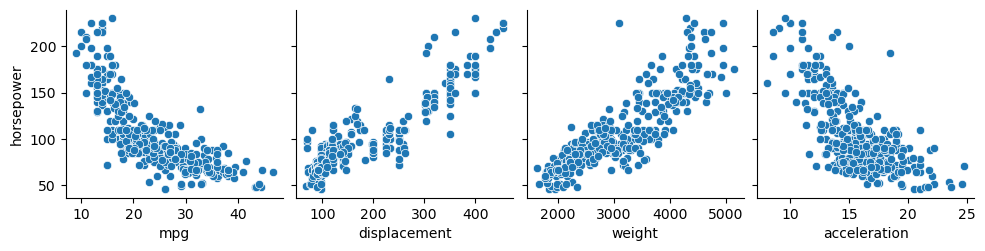

In [45]:
sns.pairplot(df, x_vars=['mpg', 'displacement',  'weight',
       'acceleration'], y_vars='horsepower')

In [46]:
df[['mpg', 'displacement', 'weight', 'acceleration']].corr()

,mpg,displacement,weight,acceleration
mpg,1.000000,-0.805127,-0.832244,0.423329
displacement,-0.805127,1.000000,0.932994,-0.543800
weight,-0.832244,0.932994,1.000000,-0.416839
acceleration,0.423329,-0.543800,-0.416839,1.000000


In [47]:
pd.Series([variance_inflation_factor(df[['mpg', 'displacement']].values, i)
               for i in range(df[['mpg', 'displacement']].shape[1])],
              index=df[['mpg', 'displacement']].columns)

mpg             2.04919
displacement    2.04919
dtype: float64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(df[['mpg', 'displacement']], df[['horsepower']], train_size=0.7, random_state=42)

In [49]:
reg = sm.OLS(y_train, X_train).fit()

In [50]:
print(reg.summary())

                                 OLS Regression Results                                
Dep. Variable:             horsepower   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              4470.
Date:                Wed, 08 May 2024   Prob (F-statistic):                   8.98e-209
Time:                        13:26:49   Log-Likelihood:                         -1198.1
No. Observations:                 274   AIC:                                      2400.
Df Residuals:                     272   BIC:                                      2407.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [51]:
y_hat_train = reg.predict(X_train)

In [52]:
resid = y_hat_train.values-y_train.values.squeeze()

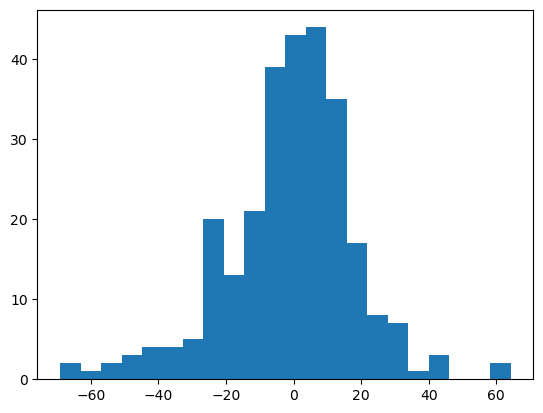

In [53]:
plt.hist(resid, bins='fd')
plt.show()

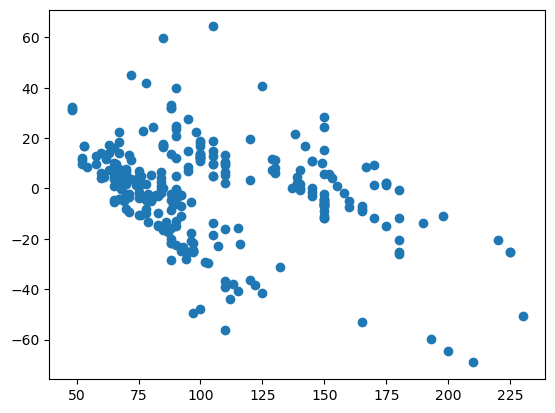

In [54]:
plt.scatter(y_train.values, resid)

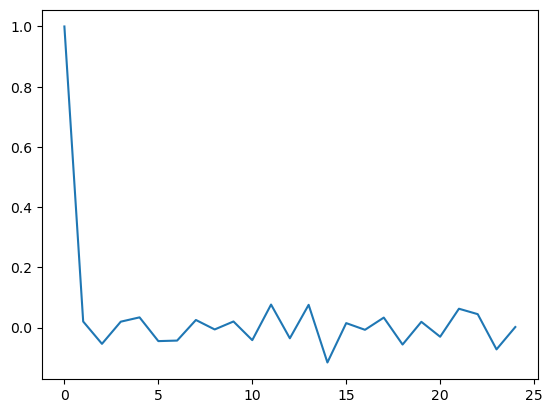

In [55]:
plt.plot(acf(resid))

In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
df['mpg_squared'] = df.mpg**2

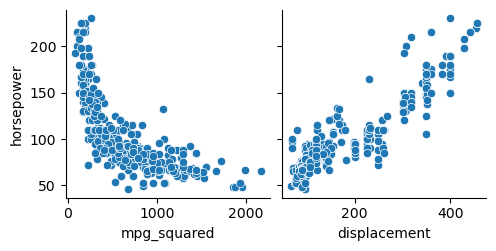

In [58]:
sns.pairplot(df, x_vars=['mpg_squared', 'displacement'], y_vars='horsepower')

In [59]:
df[['mpg_squared', 'displacement']].corr()

,mpg_squared,displacement
mpg_squared,1.00000,-0.73185
displacement,-0.73185,1.00000


In [60]:
X_train, X_test, y_train, y_test = train_test_split(df[['mpg_squared', 'displacement']], df[['horsepower']], train_size=0.7, random_state=42)

In [61]:
reg = sm.OLS(y_train, X_train).fit()

In [62]:
print(reg.summary())

                                 OLS Regression Results                                
Dep. Variable:             horsepower   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              3880.
Date:                Wed, 08 May 2024   Prob (F-statistic):                   1.12e-200
Time:                        13:27:48   Log-Likelihood:                         -1216.8
No. Observations:                 274   AIC:                                      2438.
Df Residuals:                     272   BIC:                                      2445.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [63]:
y_hat_train = reg.predict(X_train)

In [64]:
resid = y_hat_train.values-y_train.values.squeeze()

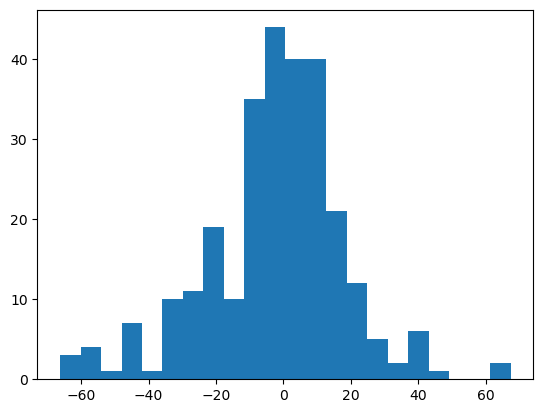

In [65]:
plt.hist(resid, bins='fd')
plt.show()

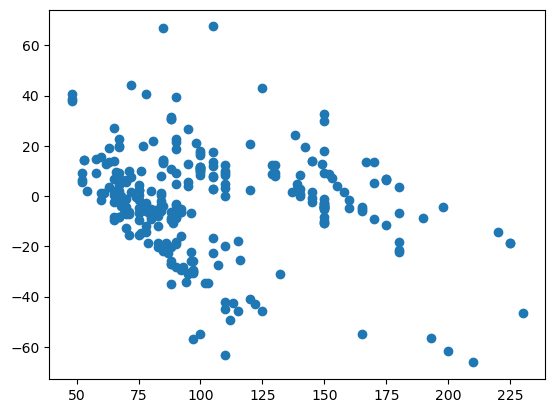

In [66]:
plt.scatter(y_train.values, resid)

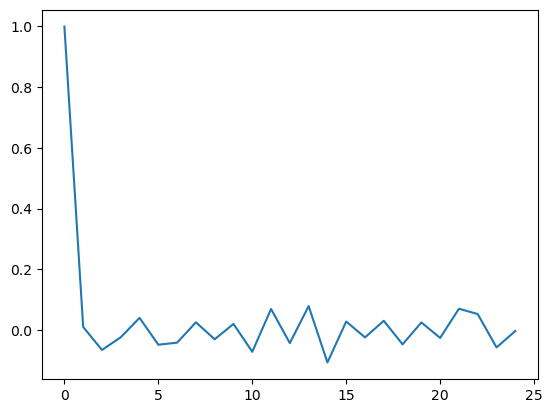

In [67]:
plt.plot(acf(resid))

In [68]:
df.origin = df.origin.astype('category')

In [69]:
pd.get_dummies(df, drop_first=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,log_mpg,const,mpg_squared,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,2.890372,1,324.0,False,False
1,15.0,8,350.0,165,3693,11.5,70,2.708050,1,225.0,False,False
2,18.0,8,318.0,150,3436,11.0,70,2.890372,1,324.0,False,False
3,16.0,8,304.0,150,3433,12.0,70,2.772589,1,256.0,False,False
4,17.0,8,302.0,140,3449,10.5,70,2.833213,1,289.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,3.295837,1,729.0,False,False
394,44.0,4,97.0,52,2130,24.6,82,3.784190,1,1936.0,True,False
395,32.0,4,135.0,84,2295,11.6,82,3.465736,1,1024.0,False,False
396,28.0,4,120.0,79,2625,18.6,82,3.332205,1,784.0,False,False


In [73]:
#df['car_brand'] = df.car_name.str.split(' ')

In [72]:
#df.car_brand = df.apply(lambda row: row.car_brand[0], axis=1)

In [ ]:
df.car_brand.unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [ ]:
df.car_brand = df.car_brand.replace({'vw': 'volkswagen',
            'maxda': 'mazda',
            'chevroelt': 'chevrolet',
            'mercedes': 'mercedes-benz',
            'vokswagen': 'volkswagen',
            'chevy': 'chevrolet',
            'toyouta': 'toyota'})

In [ ]:
cars_to_keep = df.car_brand.value_counts().index[0:14]

In [ ]:
cars_to_keep

Index(['ford', 'chevrolet', 'plymouth', 'dodge', 'amc', 'toyota', 'datsun',
       'volkswagen', 'buick', 'pontiac', 'honda', 'mazda', 'mercury',
       'oldsmobile'],
      dtype='object')

In [ ]:
df.loc[~df.car_brand.isin(cars_to_keep), 'car_brand'] = 'other'

In [ ]:
df.car_brand.value_counts()

other         61
ford          48
chevrolet     47
plymouth      31
dodge         28
amc           27
toyota        26
datsun        23
volkswagen    22
buick         17
pontiac       16
honda         13
mazda         12
mercury       11
oldsmobile    10
Name: car_brand, dtype: int64

In [ ]:
df = df.drop('car_name', axis=1)

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df = df.drop(['origin_1', 'car_brand_other'], axis=1)

In [ ]:
y = df.horsepower

In [ ]:
df = df.drop('horsepower', axis=1)

In [ ]:
df['const'] = 1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, train_size=0.7, random_state=42)

In [ ]:
reg = sm.OLS(y_train, X_train).fit()

In [ ]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:             horsepower   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     115.6
Date:                Mon, 15 Nov 2021   Prob (F-statistic):          7.36e-118
Time:                        16:32:45   Log-Likelihood:                -1055.8
No. Observations:                 274   AIC:                             2158.
Df Residuals:                     251   BIC:                             2241.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
mpg                     -0.5975 

In [74]:
df.origin = df.origin.replace({1: 'USA',
                   2: 'Non-USA',
                   3: 'Non-USA'})

In [75]:
df.origin.value_counts(normalize=True)

origin
USA        0.625
Non-USA    0.375
Name: proportion, dtype: float64

In [76]:
y = pd.get_dummies(df.origin).USA

In [77]:
df = df.drop('origin', axis=1)

In [78]:
df = df.drop('car_name', axis=1)

KeyError: "['car_name'] not found in axis"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, train_size=0.7, random_state=42)

In [ ]:
log_reg = LogisticRegression(fit_intercept=True, max_iter=200)

In [ ]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
log_reg.coef_

array([[-0.19718646, -1.48645267,  0.13879012, -0.05297651, -0.00638575,
         0.03963575,  0.18196659]])

In [ ]:
log_reg.intercept_

array([-0.10802312])

## Метрики при класификация

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [ ]:
log_reg.score(X_train, y_train)

0.8941605839416058

In [ ]:
y_hat_train = log_reg.predict(X_train)

In [ ]:
cm = pd.DataFrame(confusion_matrix(y_train, y_hat_train))

In [ ]:
cm.columns=['pred_0', 'pred_1']

In [ ]:
cm.index=['true_0', 'true_1']

In [ ]:
cm

,pred_0,pred_1
true_0,87,10
true_1,19,158


In [ ]:
158/177

0.8926553672316384

In [ ]:
recall_score(y_train, y_hat_train)

0.8926553672316384

Precision

In [ ]:
158/168

0.9404761904761905

In [ ]:
precision_score(y_train, y_hat_train)

0.9404761904761905

F1 score

In [ ]:
f1_score(y_train, y_hat_train)

0.9159420289855073